In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
sns.set()

In [3]:
dataset = load_dataset("ucberkeley-dlab/measuring-hate-speech")

In [4]:
df = dataset['train'].to_pandas()
df

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,37080,8590,2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135552,22986,8303,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
135553,21008,6207,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135554,22986,7886,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [5]:
dataset.keys()

dict_keys(['train'])

In [6]:
i = 10
for col in df.columns:
    i += 1
    print(col, end=', ')
    if i % 10 == 0:
        print()
        

comment_id, annotator_id, platform, sentiment, respect, insult, humiliate, status, dehumanize, violence, 
genocide, attack_defend, hatespeech, hate_speech_score, text, infitms, outfitms, annotator_severity, std_err, annotator_infitms, 
annotator_outfitms, hypothesis, target_race_asian, target_race_black, target_race_latinx, target_race_middle_eastern, target_race_native_american, target_race_pacific_islander, target_race_white, target_race_other, 
target_race, target_religion_atheist, target_religion_buddhist, target_religion_christian, target_religion_hindu, target_religion_jewish, target_religion_mormon, target_religion_muslim, target_religion_other, target_religion, 
target_origin_immigrant, target_origin_migrant_worker, target_origin_specific_country, target_origin_undocumented, target_origin_other, target_origin, target_gender_men, target_gender_non_binary, target_gender_transgender_men, target_gender_transgender_unspecified, 
target_gender_transgender_women, target_gender_women, 

In [7]:
analize_df = df[['text', 'hatespeech']]
analize_df

,text,hatespeech
0,Yes indeed. She sort of reminds me of the elde...,0.0
1,The trans women reading this tweet right now i...,0.0
2,Question: These 4 broads who criticize America...,2.0
3,It is about time for all illegals to go back t...,0.0
4,For starters bend over the one in pink and kic...,2.0
...,...,...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,0.0
135552,Millions of #Yemen-is participated in mass ral...,0.0
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,0.0
135554,Millions of #Yemen-is participated in mass ral...,0.0


Text(0.5, 1.0, 'Count of hate speech labels across the dataset')

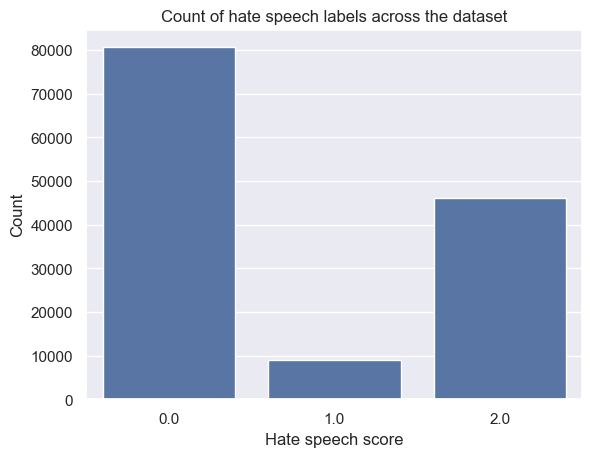

In [8]:
sns.countplot(x='hatespeech', data=analize_df)
plt.xlabel("Hate speech score")
plt.ylabel("Count")
plt.title("Count of hate speech labels across the dataset")

In [9]:
analize_df.dtypes

text           object
hatespeech    float64
dtype: object

In [10]:
analize_df['hatespeech'] = analize_df['hatespeech'].apply(int)

/var/folders/10/w1qyrfc52_113szccjqfym200000gn/T/ipykernel_7729/950113162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analize_df['hatespeech'] = analize_df['hatespeech'].apply(int)


In [11]:
score_1 = analize_df[analize_df['hatespeech'] == 1]

In [12]:
count_text = 0
for it, row in score_1.iterrows():
    count_text += 1
    print(row['text'])
    print()
    if count_text == 5:
        break

@ghostofthor same energy as the "YOU DONT LOOK INDIAN STOP LYING ABOUT BEING SOUTH ASIAN" cc

Y'all always slip up and say how y'all see women period because this includes the majority of women in yall lives that's not related to you. Especially since men demand pussy just from taking you out, selling you weed or even being nice to you. Niggas can't even be friends lol URL

They wanna fuck so bad, just do it already, nobody cares if you're gay.

Fuck Yeah ! Filthy Fuck'n Dirty Cock Cleanin' Sweat Fuck'n Drippin' Total Fuck'n Bottom Slut Christian Gettin' Gang Fuck'n Bred Hard and Fuck'n Rough for Balls Deep Fuck'n Loads of Filthy Fuck'n Dirty Cum Floodin' His Greedy Slutted Out Fuck'n Cunt (T.I.M)(Final Part) 👍 URL

Are you people actually believing this propaganda.....  These ratchet women haven't done a thing , except spew hate and rhetoric....they are gonna get Saddamed...



In [13]:
def fix_score(score):
    if score >= 1:
        return 1
    else:
        return 0

analize_df['hatespeech'] = analize_df['hatespeech'].apply(fix_score)

/var/folders/10/w1qyrfc52_113szccjqfym200000gn/T/ipykernel_7729/1235265368.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analize_df['hatespeech'] = analize_df['hatespeech'].apply(fix_score)


In [14]:
score_0 = analize_df[analize_df['hatespeech'] == 0]

In [15]:
count_text = 0
for it, row in score_0.iterrows():
    count_text += 1
    print(row['text'])
    print()
    if count_text == 5:
        break

Yes indeed. She sort of reminds me of the elder lady that played the part in the movie "Titanic" who was telling her story!!! And I wouldn't have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!

The trans women reading this tweet right now is beautiful

It is about time for all illegals to go back to their country of origin and keep our freeway open and prevent heavy traffic.

Sounds like the kinda wholsesome life I'd die for ❤️ never met any black Lesbians before so i guess you're my first ever.

OMG! The EGO's of these young, young, inexperienced women display are remarkable! So self absorbed - so, so proud of the mistakes their constituents all made in giving them a bit of power.  They'll be quite surprised to find that the vast majority of Americans think that these women represent the very WORST of "modern" America.  Egos out of control !!



In [16]:
analize_df.hatespeech.value_counts()

hatespeech
0    80624
1    54932
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of hate speech labels across the dataset')

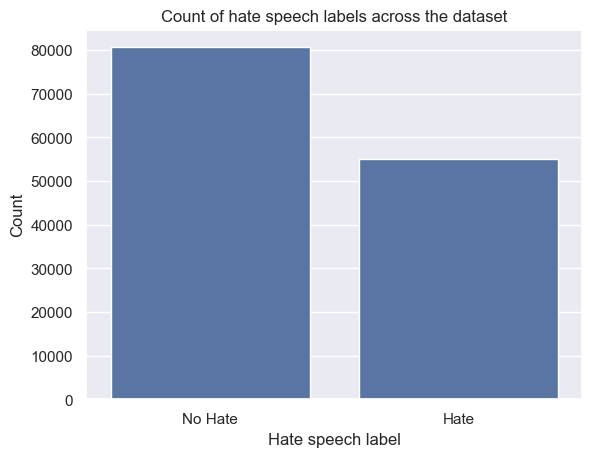

In [17]:
sns.countplot(x='hatespeech', data=analize_df)
plt.xlabel("Hate speech label")
plt.xticks(ticks=[0, 1], labels=['No Hate', 'Hate'])

plt.ylabel("Count")
plt.title("Count of hate speech labels across the dataset")

In [18]:
from wordcloud import WordCloud

In [19]:
hate_text = ""
no_hate_text = ""

for it, row in analize_df.iterrows():
    if row['hatespeech'] == 0:
        no_hate_text += row['text'] + ' '
    else:
        hate_text += row['text'] + ' '


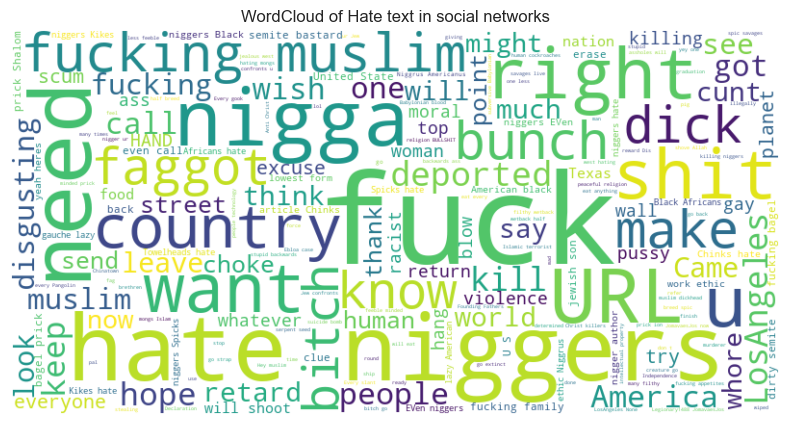

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(hate_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Desactivar los ejes
plt.title("WordCloud of Hate text in social networks")
plt.show()

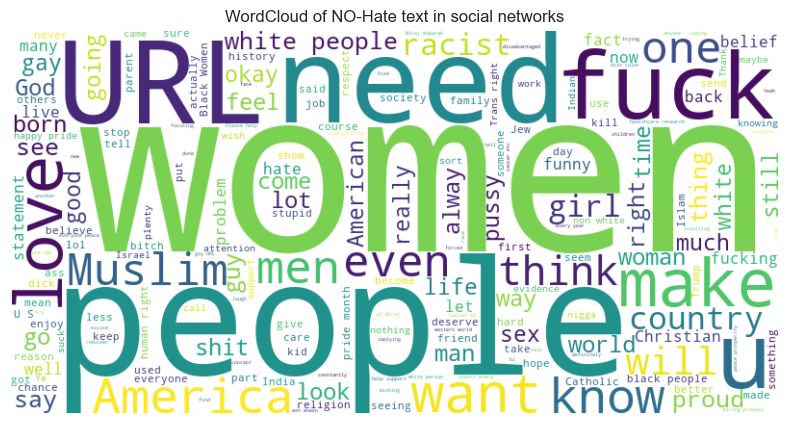

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(no_hate_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Desactivar los ejes
plt.title("WordCloud of NO-Hate text in social networks")
plt.show()

### Lenght of text

In [24]:
analize_df['str_len'] = analize_df['text'].apply(len)

/var/folders/10/w1qyrfc52_113szccjqfym200000gn/T/ipykernel_7729/337762172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analize_df['str_len'] = analize_df['text'].apply(len)


Text(0, 0.5, 'Frequency')

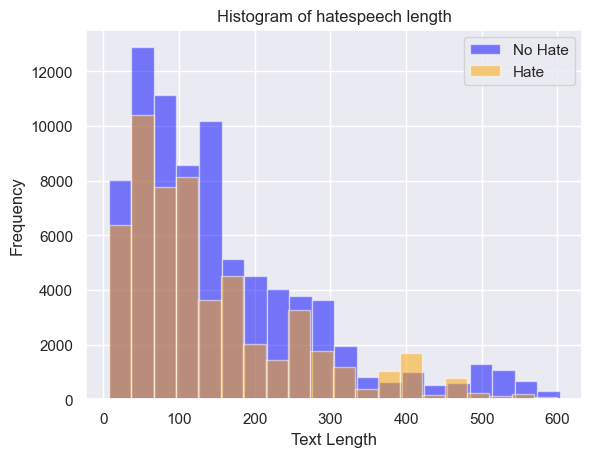

In [27]:
fig, ax = plt.subplots()
label_equivalence = {0: "No Hate", 1: "Hate"}
colors = {0: 'blue', 1: 'orange'}
for label, color in colors.items():
    subset = analize_df[analize_df['hatespeech'] == label]
    ax.hist(subset['str_len'], bins=20, alpha=0.5, color=color, label=label_equivalence[label])

# Añadir leyenda y etiquetas
ax.legend()
ax.set_title('Histogram of hatespeech length')
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')

## Preprocessing

In [ ]:
import string

In [ ]:
def preprocess_text(text):
    text = text.lower()
    
    text = ''.join(char for char in text if char not in string.punctuation)
    
    return text

In [ ]:
analize_df['text'] = analize_df['text']

